<a href="https://colab.research.google.com/github/BazaiHassan/tesnorflow-DeepLearning/blob/main/tf_food101_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to CNN

In [1]:
import zipfile

In [2]:
# Download the dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-07 18:12:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 108.177.98.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   216MB/s    in 0.5s    

2023-11-07 18:12:48 (216 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# Inspect the data
!ls pizza_steak/

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/pizza/

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [6]:
import os

In [7]:
# Walk through pizza_steak directory
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"Directories: {len(dirnames)} **** Images: {len(filenames)} **** The directory is {dirpath}")

Directories: 2 **** Images: 0 **** The directory is pizza_steak
Directories: 2 **** Images: 0 **** The directory is pizza_steak/test
Directories: 0 **** Images: 250 **** The directory is pizza_steak/test/steak
Directories: 0 **** Images: 250 **** The directory is pizza_steak/test/pizza
Directories: 2 **** Images: 0 **** The directory is pizza_steak/train
Directories: 0 **** Images: 750 **** The directory is pizza_steak/train/steak
Directories: 0 **** Images: 750 **** The directory is pizza_steak/train/pizza


In [8]:
# Another way to check the len of each directory
num_steak_image_train = len(os.listdir('pizza_steak/train/steak'))
num_pizza_image_train = len(os.listdir('pizza_steak/train/pizza'))

num_steak_image_test = len(os.listdir('pizza_steak/test/steak'))
num_pizza_image_test = len(os.listdir('pizza_steak/test/pizza'))

print('Steak (Train, Test) ---->',num_steak_image_train,num_steak_image_test)

print('Pizza (Train, Test) ---->',num_pizza_image_train, num_pizza_image_test)

Steak (Train, Test) ----> 750 250
Pizza (Train, Test) ----> 750 250


In [9]:
# get the class name
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([
    item.name for item in data_dir.glob("*")
]))

print(class_names)

['pizza' 'steak']


In [10]:
# Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print("Random Image:",random_image)

  # Read and plot the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  print("Image Directory:",target_folder)
  plt.imshow(img)
  plt.title(target_class)

  print(f"Image Shape =  {img.shape}")

  return img

Random Image: ['838344.jpg']
Image Directory: pizza_steak/train/steak
Image Shape =  (512, 512, 3)


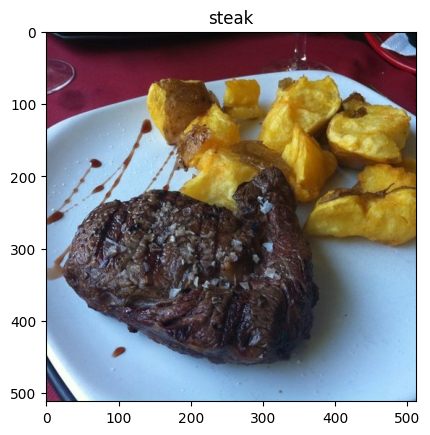

In [11]:
# View a random image
img = view_random_images(
    target_dir='pizza_steak/train/',
    target_class='steak'
)

Random Image: ['1593835.jpg']
Image Directory: pizza_steak/train/pizza
Image Shape =  (384, 512, 3)


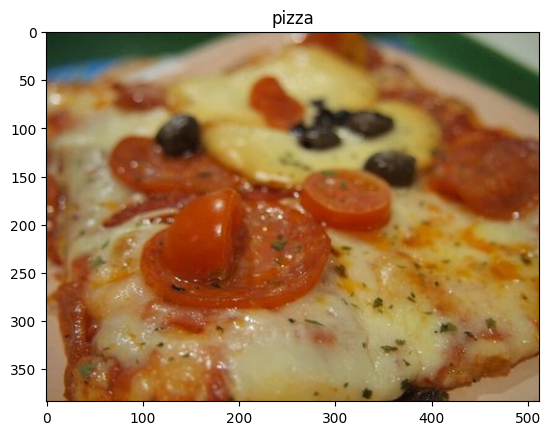

In [12]:
# View a random image
img = view_random_images(
    target_dir='pizza_steak/train/',
    target_class='pizza'
)

In [13]:
# Covert to tensor
print(f"The type of images are: {img.dtype}")

import tensorflow as tf

img = tf.constant(img)

print(f"Now! The type of images are: {img.dtype}")

The type of images are: uint8
Now! The type of images are: <dtype: 'uint8'>


In [14]:
# Shape of image ---> [height, width, channels]
img.shape

TensorShape([384, 512, 3])

# Start to build a CNN (Model_1)

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from the directory
train_data = train_datagen.flow_from_directory(
    directory= train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed=42
)

valid_data = valid_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "binary",
    seed = 42
)

# Build a CNN model (Tiny VGG from CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_1.compile(
    loss = tf.keras.losses.BinaryFocalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data= valid_data,
    validation_steps= len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 166ms/step - loss: 0.1759 - accuracy: 0.6307 - val_loss: 0.1208 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.1225 - accuracy: 0.7907 - val_loss: 0.1097 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 7s 159ms/step - loss: 0.1162 - accuracy: 0.7967 - val_loss: 0.0973 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.1041 - accuracy: 0.8200 - val_loss: 0.0949 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.0966 - accuracy: 0.8427 - val_loss: 0.0874 - val_accuracy: 0.8660


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

<Axes: title={'center': 'Results status'}>

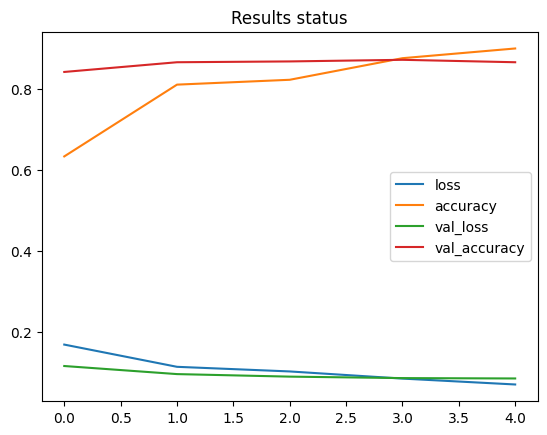

In [ ]:
import pandas as pd

pd.DataFrame(history_1.history).plot(title = "Results status")

16/16 [==============================] - 1s 88ms/step


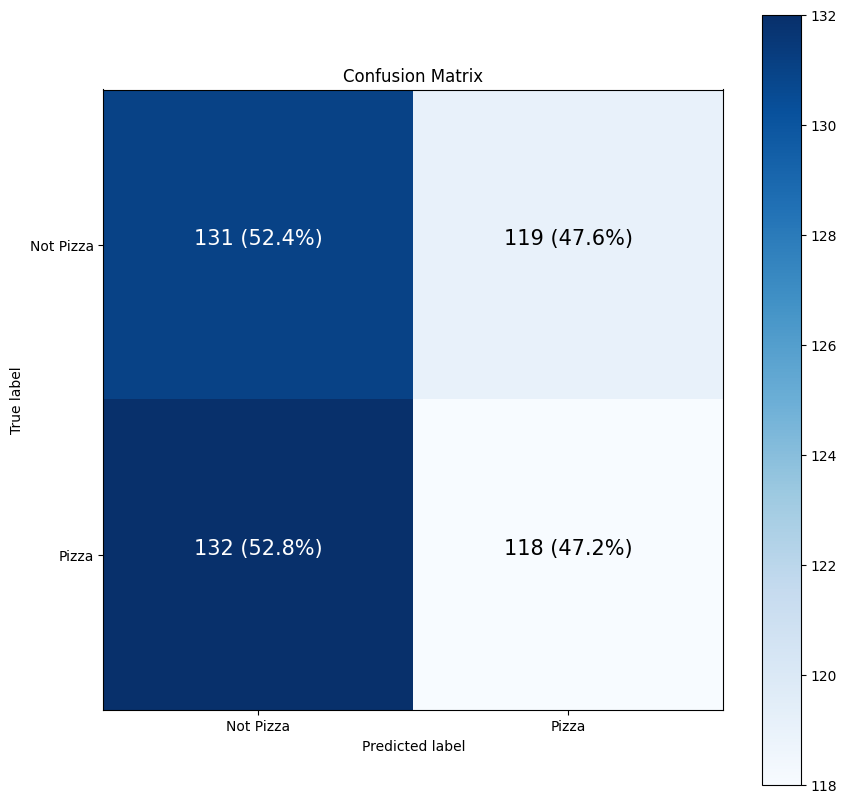

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=8):
    """
    Makes a labeled confusion matrix comparing predictions and ground truth labels.

    Args:
        y_true: Array of truth labels (must be the same shape as y_pred).
        y_pred: Array of predicted labels (must be the same shape as y_true).
        classes: Array of class labels (e.g., string form). If `None`, integer labels are used.
        figsize: Size of the output figure (default=(10, 10)).
        text_size: Size of the output figure text (default=15).

    Returns:
        A labeled confusion matrix plot comparing y_true and y_pred.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # Normalize it
    n_classes = cm.shape[0]  # Find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)  # Colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),  # Create enough axis slots for each class
           yticks=np.arange(n_classes),
           xticklabels=labels,  # Axes will be labeled with class names (if they exist) or ints
           yticklabels=labels)

    # Make x-axis labels appear on the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

# Use the function to create a confusion matrix for your model
y_true = valid_data.labels  # True labels from the validation data
y_pred = model_1.predict(valid_data) > 0.5  # Predicted labels from your model (assuming 0.5 as a threshold)
class_names = ["Not Pizza", "Pizza"]  # Class names for binary classification

make_confusion_matrix(y_true, y_pred, classes=class_names, figsize=(10, 10), text_size=15)
plt.show()


# Using previous model to classify this dataset (Model_2)

In [ ]:
len(train_data), len(valid_data)

(47, 16)

In [ ]:
# set random seed
tf.random.set_seed(42)

In [ ]:
# Create the model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics="accuracy"
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 12s 114ms/step - loss: 0.6933 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.4813 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.4733 - val_loss: 0.6931 - val_accuracy: 0.5000


<Axes: title={'center': 'Results status'}>

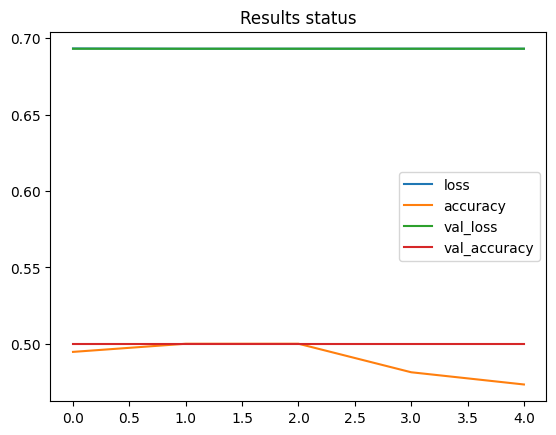

In [ ]:
import pandas as pd

pd.DataFrame(history_2.history).plot(title = "Results status")

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Upgrade the previous model (Model_3)

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 110ms/step - loss: 2.0085 - accuracy: 0.6400 - val_loss: 0.5403 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 1.1470 - accuracy: 0.6760 - val_loss: 1.3177 - val_accuracy: 0.5580
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.8071 - accuracy: 0.6993 - val_loss: 0.4794 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6760 - accuracy: 0.7273 - val_loss: 0.4529 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6077 - accuracy: 0.7620 - val_loss: 0.4219 - val_accuracy: 0.8020


<Axes: title={'center': 'Results status'}>

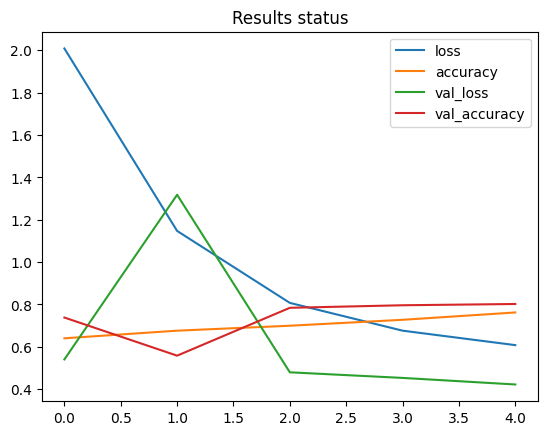

In [ ]:
# plot the history
import pandas as pd
pd.DataFrame(history_3.history).plot(title ="Results status")

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 100)               15052900  
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Binary Classification: Break it down

## 1. Visualize Data

In [24]:
# Lets visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
  # Setup the target directory
  target_folder = target_dir + target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print("Random Image:",random_image)

  # Read and plot the image
  img = mpimg.imread(target_folder + "/" + random_image[0])
  print("Image Directory:",target_folder)
  plt.imshow(img)
  plt.title(target_class)

  print(f"Image Shape =  {img.shape}")

  return img

Random Image: ['2286639.jpg']
Image Directory: pizza_steak/train/steak
Image Shape =  (512, 512, 3)
Random Image: ['1671531.jpg']
Image Directory: pizza_steak/train/pizza
Image Shape =  (512, 512, 3)


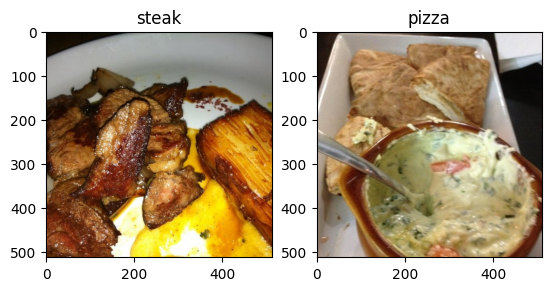

In [27]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_images("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_images("pizza_steak/train/", "pizza")


## 2. Preprocess the data

In [16]:
# Define directory dataset paths
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [17]:
# turn our data to a batches (In my experience each batch must have 32 images)
!nvidia-smi

# Create train/test data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224),
    class_mode = "binary",
    batch_size = 32
)

test_data = test_datagen.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    class_mode = "binary",
    batch_size = 32
)

Tue Nov  7 18:13:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0    32W /  70W |    361MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
# Get a sample of a train data batch
images, labels = train_data.next()


print(f"We have {len(train_data)} batches of images, each batch has {len(images)} images")
print(f"It means all the train data are about 47 x 32 ~ {len(train_data)*len(images)}")

We have 47 batches of images, each batch has 32 images
It means all the train data are about 47 x 32 ~ 1504


##3. Create a CNN model from scratch

In [19]:
# import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.src.layers.serialization import activation
# Create the model
model_4 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size=3,
        strides = 1,
        padding = "valid",
        activation="relu",
        input_shape=(224, 224, 3)
    ),
    Conv2D(10, 3, activation="relu"), # This layer exactly is the same as above layer without input_shape parameter
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = "accuracy"
)

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. Fit the model

In [ ]:
from sklearn.utils import validation
# fit the model
history_4 = model_4.fit(
    train_data, # This is a combination of labels and samples
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 23s 171ms/step - loss: 0.7128 - accuracy: 0.5740 - val_loss: 0.5717 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4652 - accuracy: 0.7787 - val_loss: 0.6190 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.2976 - accuracy: 0.8913 - val_loss: 0.4188 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 6s 121ms/step - loss: 0.1118 - accuracy: 0.9687 - val_loss: 0.3604 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 7s 143ms/step - loss: 0.0328 - accuracy: 0.9953 - val_loss: 0.5289 - val_accuracy: 0.7800


## 5. Evaluate the model

<Axes: title={'center': 'Model_4 Training Curves'}>

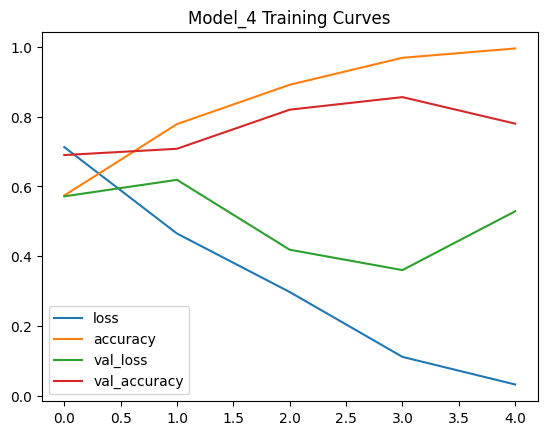

In [ ]:
# Training Curves
import pandas as pd
pd.DataFrame(history_4.history).plot(title="Model_4 Training Curves")

In [28]:
# Plotting separate curves
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["val_accuracy"]))

  # Plot Loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

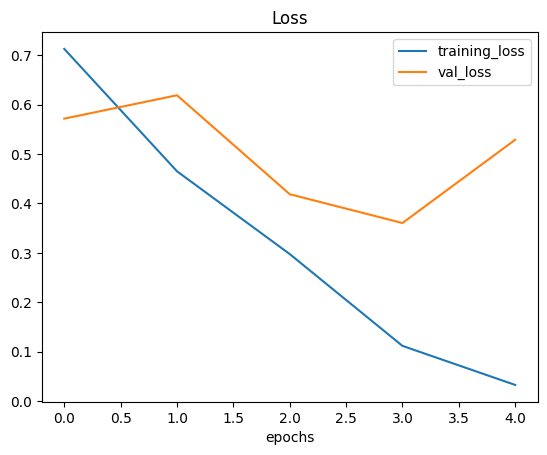

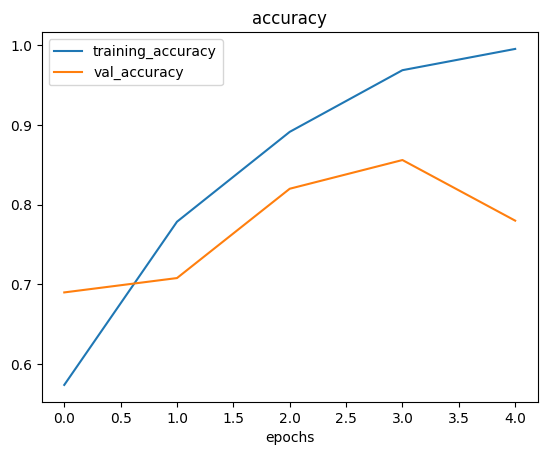

In [ ]:
# checkout loss and accuracy
plot_loss_curves(history_4)

> 🔑 **Note:** As you can see the `trainin loss` is going down 🙂, but `valalidation` loss is increasing and is not good 😠, I think it is because of **overfitting**.

In [ ]:
# Adjust the model parameters
'''
Fitting a machine learning model comes in 3 steps:

0. Create a basline.

1. Beat the baseline by overfitting a larger model.

3. Reduce overfitting.


And there are even a few more things we could try to further overfit our model:

Increase the number of convolutional layers.
Increase the number of convolutional filters.
Add another dense layer to the output of our flattened layer.
'''



"\nFitting a machine learning model comes in 3 steps: 0. Create a basline.\n\nBeat the baseline by overfitting a larger model.\nReduce overfitting.\nSo far we've gone through steps 0 and 1.\n\nAnd there are even a few more things we could try to further overfit our model:\n\nIncrease the number of convolutional layers.\nIncrease the number of convolutional filters.\nAdd another dense layer to the output of our flattened layer.\n"

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size=2), # Default value is 2 also
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics=["accuracy"]
)

In [ ]:
# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch = len(train_data),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 11s 148ms/step - loss: 0.5833 - accuracy: 0.6993 - val_loss: 0.4950 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.4669 - accuracy: 0.7847 - val_loss: 0.4282 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.4217 - accuracy: 0.8093 - val_loss: 0.3807 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4016 - accuracy: 0.8280 - val_loss: 0.3648 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 6s 136ms/step - loss: 0.3621 - accuracy: 0.8473 - val_loss: 0.3472 - val_accuracy: 0.8600


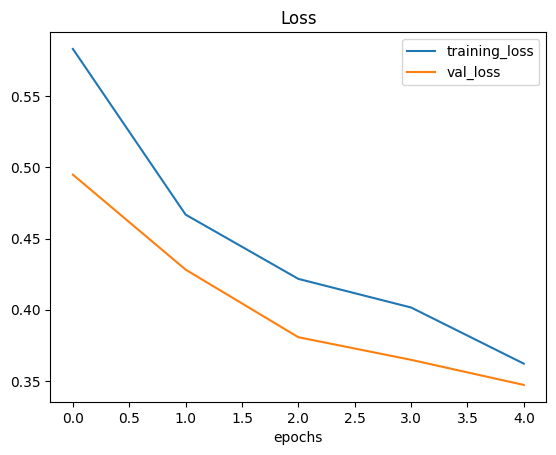

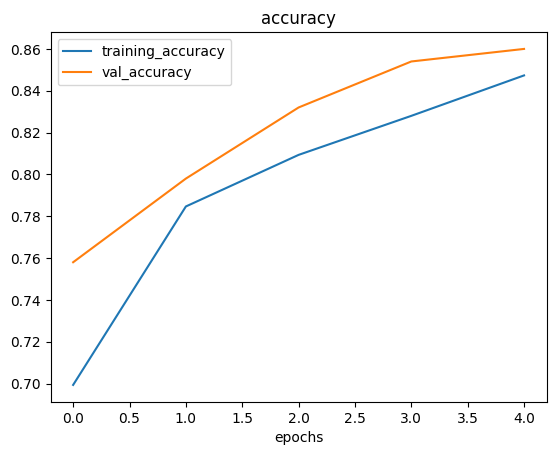

In [ ]:
# checkout loss and accuracy
plot_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)       

👉 **point:** As you can see the behavior of training and validation curves `blue, orang` are same. It is a good news.

🔑 **Impotant:** Reducing overfitting is also known as `Regularization`

## 6. Data Augmentation

In [ ]:
# Now lets use data augmentation to reduce overfitting and make our model smarter
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255., # rotate the image slightly between 0 and 20 degrees
    rotation_range = 0.2,  # shear the image
    shear_range=0.2, # zoom into the image
    zoom_range=0.2, # shift the image width ways
    width_shift_range=0.2, # shift the image height ways
    height_shift_range=0.3, # flip the image on the horizontal axis
    horizontal_flip = True
)

In [ ]:
# Create image data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our 👉 `training data`, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [ ]:
# Let's checkout augmented and non-augmented trainging data
print("Augmented Training Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="binary",
    shuffle=False # Just for comparing, but in real project make it True
)

print("Non-Augmented Training Data")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="binary",
    shuffle=False # Just for comparing, but in real project make it True
)

print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="binary"
)

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 1500 images belonging to 2 classes.


Text(0.5, 1.0, 'Augmented')

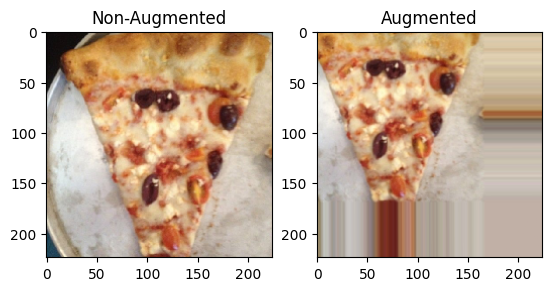

In [ ]:
# See augmented & non-augmented training data
images, labels = train_data.next()

images_augmented, labels_augmented = train_data_augmented.next()

import random
random_sample = random.randint(0, len(images))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(images[random_sample])
plt.title("Non-Augmented")
plt.subplot(1,2,2)
plt.imshow(images_augmented[random_sample])
plt.title("Augmented")

### Create model and train it by using augmented data and compare the results with non-augmented data

In [ ]:
# train a model use augmented data
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size=2), # Default value is 2 also
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics=["accuracy"]
)

In [ ]:
# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 27s 551ms/step - loss: 0.7222 - accuracy: 0.4467 - val_loss: 0.6867 - val_accuracy: 0.6327
Epoch 2/5
47/47 [==============================] - 28s 600ms/step - loss: 0.6898 - accuracy: 0.5827 - val_loss: 0.6608 - val_accuracy: 0.7753
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6805 - accuracy: 0.6240 - val_loss: 0.6472 - val_accuracy: 0.7160
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6652 - accuracy: 0.6213 - val_loss: 0.5936 - val_accuracy: 0.7573
Epoch 5/5
47/47 [==============================] - 25s 533ms/step - loss: 0.6323 - accuracy: 0.6907 - val_loss: 0.5302 - val_accuracy: 0.7613


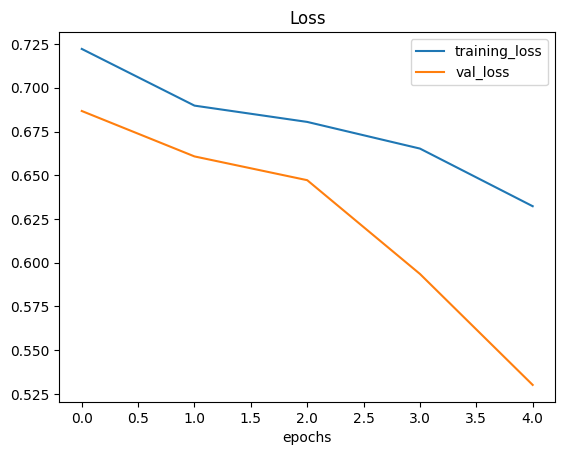

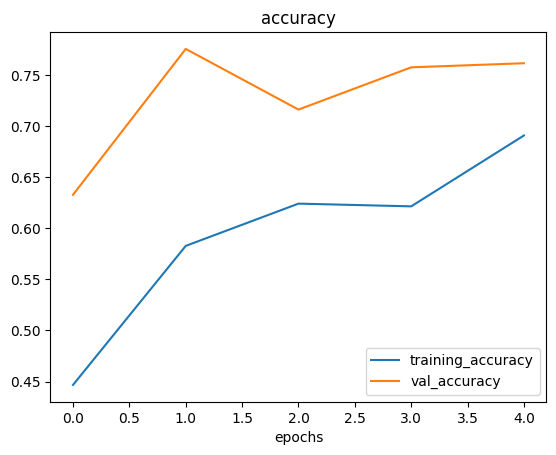

In [ ]:
plot_loss_curves(history_6)

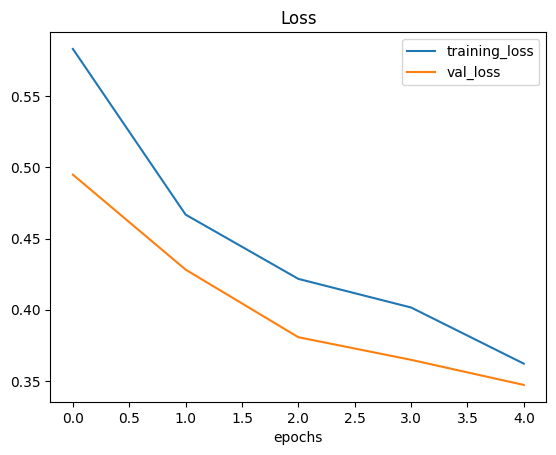

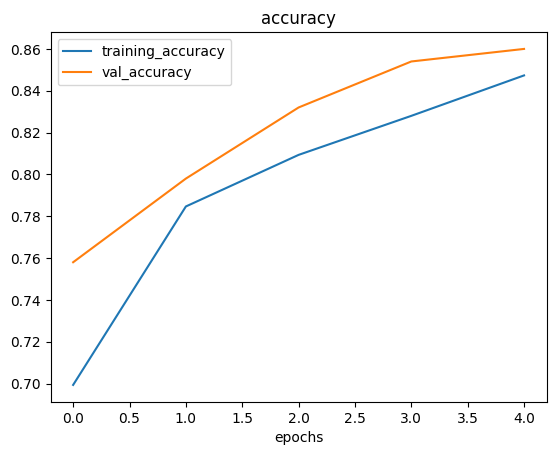

In [ ]:
plot_loss_curves(history_5)

## Try to shuffle data and build another data (model_7)

In [20]:
# Now lets use data augmentation to reduce overfitting and make our model smarter
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255., # rotate the image slightly between 0 and 20 degrees
    rotation_range = 0.2,  # shear the image
    shear_range=0.2, # zoom into the image
    zoom_range=0.2, # shift the image width ways
    width_shift_range=0.2, # shift the image height ways
    height_shift_range=0.3, # flip the image on the horizontal axis
    horizontal_flip = True
)


# Create image data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


# Let's checkout augmented and non-augmented trainging data
print("Augmented Training Data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="binary",
    shuffle=True
)

print("Non-Augmented Training Data")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="binary",
    shuffle=True
)

print("Non-Augmented Test Data")
test_data = test_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode="binary"
)

Augmented Training Data:
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-Augmented Test Data
Found 1500 images belonging to 2 classes.


In [21]:
# train a model use augmented data
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size=2), # Default value is 2 also
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


# Compile the model
model_7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer = Adam(),
    metrics=["accuracy"]
)

In [22]:
# Fit the model
history_7 = model_7.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch = len(train_data_augmented),
    validation_data = test_data,
    validation_steps = len(test_data)
)

Epoch 1/5
47/47 [==============================] - 36s 499ms/step - loss: 0.6851 - accuracy: 0.5767 - val_loss: 0.6382 - val_accuracy: 0.7253
Epoch 2/5
47/47 [==============================] - 23s 486ms/step - loss: 0.6064 - accuracy: 0.6847 - val_loss: 0.5285 - val_accuracy: 0.7367
Epoch 3/5
47/47 [==============================] - 23s 492ms/step - loss: 0.5420 - accuracy: 0.7327 - val_loss: 0.4496 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.5142 - accuracy: 0.7567 - val_loss: 0.4345 - val_accuracy: 0.7993
Epoch 5/5
47/47 [==============================] - 23s 490ms/step - loss: 0.4791 - accuracy: 0.7787 - val_loss: 0.3942 - val_accuracy: 0.8227


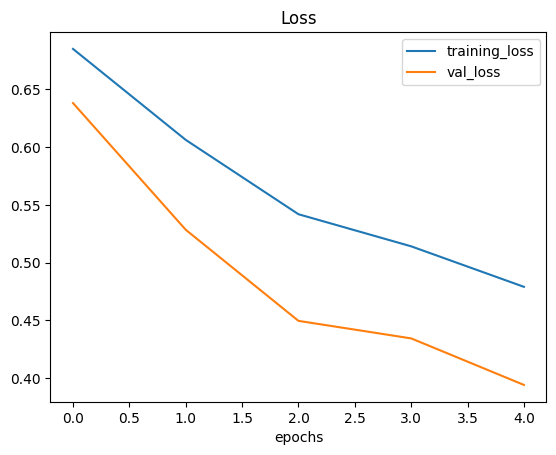

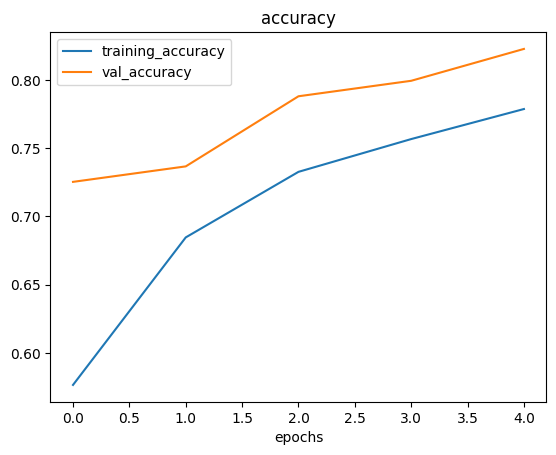

In [29]:
plot_loss_curves(history_7)

# Make a prediction by using a custom image

In [31]:
# Download an image:
!wget https://img.freepik.com/free-photo/juicy-steak-medium-rare-beef-with-spices-grilled-vegetables_24972-2328.jpg?size=626&ext=jpg&ga=GA1.1.1880011253.1699315200&semt=sph

--2023-11-07 18:35:27--  https://img.freepik.com/free-photo/juicy-steak-medium-rare-beef-with-spices-grilled-vegetables_24972-2328.jpg?size=626
Resolving img.freepik.com (img.freepik.com)... 23.216.147.170, 23.216.147.206, 2600:1408:c400:68::17db:9a48, ...
Connecting to img.freepik.com (img.freepik.com)|23.216.147.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86860 (85K) [image/jpeg]
Saving to: ‘juicy-steak-medium-rare-beef-with-spices-grilled-vegetables_24972-2328.jpg?size=626’

juicy-steak-medium- 100%[===================>]  84.82K  --.-KB/s    in 0.02s   

2023-11-07 18:35:27 (5.01 MB/s) - ‘juicy-steak-medium-rare-beef-with-spices-grilled-vegetables_24972-2328.jpg?size=626’ saved [86860/86860]



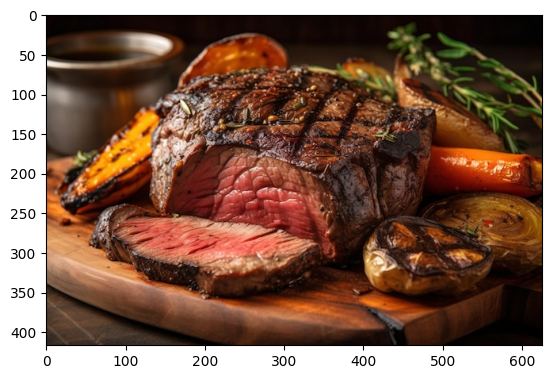

In [33]:
import matplotlib.image as mpimg

steak = mpimg.imread("steak_sample_text.jpg")
plt.imshow(steak)

In [35]:
steak.shape

(417, 626, 3)

# Helper function for custom images to be prepared:

In [39]:
def load_prep_image(filename, img_shape=224):
  # Read file
  img = tf.io.read_file(filename)

  # Decode the read data into a tensor
  img = tf.image.decode_image(img)

  # Re-size the images
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale
  img = img/255.

  return img


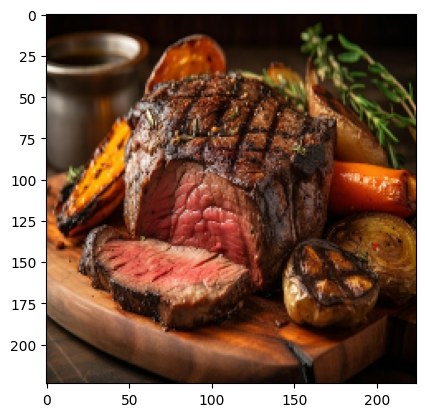

In [41]:
steak = load_prep_image("steak_sample_text.jpg")
plt.imshow(steak)

In [46]:
# Prediction probability
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 96ms/step


In [47]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [48]:
pred_class = class_names[int(tf.round(pred))]
print(f"The predicted image is :: {pred_class}")

The predicted image is :: steak


In [49]:
!wget https://img.taste.com.au/Qaei25N9/w720-h480-cfill-q80/taste/2016/11/roast-pumpkin-and-chorizo-pizzas-111258-1.jpg

--2023-11-07 19:15:17--  https://img.taste.com.au/Qaei25N9/w720-h480-cfill-q80/taste/2016/11/roast-pumpkin-and-chorizo-pizzas-111258-1.jpg
Resolving img.taste.com.au (img.taste.com.au)... 104.117.232.152
Connecting to img.taste.com.au (img.taste.com.au)|104.117.232.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73645 (72K) [image/jpeg]
Saving to: ‘roast-pumpkin-and-chorizo-pizzas-111258-1.jpg’

roast-pumpkin-and-c 100%[===================>]  71.92K  --.-KB/s    in 0.01s   

Last-modified header invalid -- time-stamp ignored.
2023-11-07 19:15:17 (4.81 MB/s) - ‘roast-pumpkin-and-chorizo-pizzas-111258-1.jpg’ saved [73645/73645]



# Helper function to predict and plot

In [53]:
def predict_plot(model, filename, class_names=class_names):

  img = load_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]
  print(f"The predicted image is :: {pred_class}")
  plt.imshow(img)
  plt.title(f"{pred_class}")


1/1 [==============================] - 0s 38ms/step
The predicted image is :: pizza


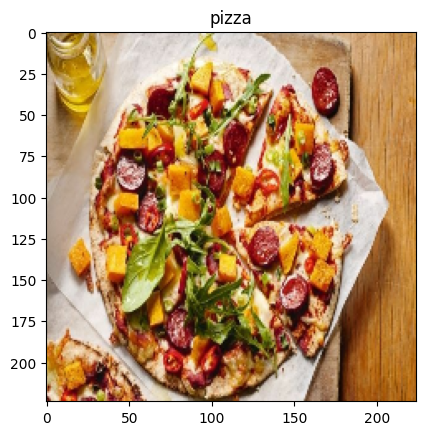

In [54]:
predict_plot(model_7, "pizza_sample.jpg")
